In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Q1

In [2]:
class P1():
    def __init__(self, m, n, winds, eps, max_iter, destination):
        self.Q_table = np.zeros((m*n, 4)) # 4 directions - N, E, S, W or up, right, down, left
        self.nu_table = np.zeros((m*n, 4))
        self.u_table = np.zeros((m*n,))
        self.m = m
        self.n = n
        self.eps = eps
        self.max_iter = max_iter
        self.winds = winds
        self.destination = destination
                    
    def solve(self):
        converged = False
        iter = 0
        Q_total = []
        while(converged == False and iter<self.max_iter):
            
            # iterating over all states
            for i in range(1, 1 + self.m*self.n):
                u = self.get_greedy_u(i, eps)
                self.nu_table[i-1, u] +=1
                self.Q_table[i-1, u] = self.Q_table[i-1, u] + self.a(self.nu_table[i-1, u])*(self.g(i, u) + self.max_u_Q(self.next_state(i, u))[1] - self.Q_table[i-1, u])
                
            iter+=1
            Q_total.append(self.Q_table.sum())
        
        return Q_total
    
    def get_greedy_u(self, s, eps):
        p = random.uniform(0, 1)
        u_opti, Qbest = self.max_u_Q(s)

        if(p>eps): #exploit
            return u_opti
        
        else: #explore
            u = self.get_random_valid_u(s, u_opti)
            return u
    
    def get_random_valid_u(self, s, u_opti):
        while(True):
            u_dash = random.randint(0, 3)
            return u_dash
        
    
    def g(self, i, u):
        r, c = self.get_r_c(self.next_state(i, u))
        if((r, c) != self.destination):
            return -1
        else:
            return 0
            
    def a(self, n):   
        return (1/n)**0.6
#         return 0.1
    
    def get_r_c(self, s):
        # to get row and col number from s. Indexes r and c are 0 based
        r = (s-1)//self.n
        c = (s-1)%self.n
        return r, c
    
    def get_s(self, r, c):
        # to get s from row and col number
        return (r*12 +c+1)
    
    
    def next_state(self, s, u):
        r, c = self.get_r_c(s)
        if(u == 0):
            return self.get_s(max(r-1-self.winds[c], 0), c)
        elif(u == 1):
            return self.get_s(max(r-self.winds[c], 0), min(c+1, 11))
        elif(u == 2):
#             print(self.winds)
#             print(r)
            return self.get_s(min(max(r+1-self.winds[c], 0), 6), c)
        elif(u == 3):
            return self.get_s(max(r-self.winds[c], 0), max(c-1, 0))
        
            
    
    def max_u_Q(self, i):
        r, c = self.get_r_c(i)
        ubest = -1
        Qbest = -np.inf
        for u in range(4):
            if(self.Q_table[i-1, u]>=Qbest):
                Qbest = self.Q_table[i-1, u]
                ubest = u
                
        return ubest, self.Q_table[i-1, ubest]
    
    def getQ(self):
        return self.Q_table
    
    def getU(self):
        
        policy = np.zeros((self.m, self.n))
        for r in range(self.m):
            for c in range(self.n):
                policy[r, c] = np.argmax(self.Q_table[self.get_s(r, c)-1])
        return policy
    
    def getnu(self):
        return self.nu_table

In [3]:
#m*n grid, m = rows, n = cols
m, n = 7, 12
winds = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0])
eps = 0.2
max_iter = 1000
dest = (3,9)
env1 = P1(m, n, winds, eps, max_iter, dest)
Q_total = env1.solve()

In [4]:
print('Q values')
env1.getQ()

Q values


array([[-16.73495762, -15.99999038, -16.6802579 , -16.59333126],
       [-15.80214811, -14.99999751, -15.7635181 , -16.30885417],
       [-14.77645096, -13.99999926, -14.84773649, -15.59117954],
       [-13.93304319, -12.9999998 , -13.83012784, -14.44601763],
       [-12.91608473, -11.99999994, -12.94099926, -13.89575497],
       [-11.94908432, -10.99999998, -11.90703274, -12.89722482],
       [-10.93195047,  -9.99999999, -10.95211805, -11.94173941],
       [ -9.96905227,  -9.        ,  -9.98733311, -10.93997951],
       [ -8.99151449,  -8.        ,  -8.9903722 ,  -9.97100274],
       [ -7.98757682,  -7.        ,  -7.99533797,  -8.98615061],
       [ -6.99198178,  -6.        ,  -6.99588832,  -7.98643909],
       [ -5.99886872,  -5.99852189,  -5.        ,  -6.99446681],
       [-16.61039782, -15.99999225, -16.59095519, -16.69031263],
       [-15.59782154, -14.99999784, -15.68369792, -16.70875722],
       [-14.76188567, -13.99999935, -14.74617256, -15.48213076],
       [-13.85475913, -12

In [5]:
print('Policy Optimal. N, E, S, W = 0, 1, 2, 3')
env1.getU()

Policy Optimal. N, E, S, W = 0, 1, 2, 3


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 0., 3.]])

Graph depicting sum of values of Q table with increase in iterations


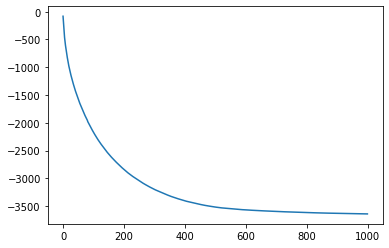

In [6]:
print('Graph depicting sum of values of Q table with increase in iterations')
plt.plot(Q_total)

### Running for different epsilons

Policy for epsilon = 0.1 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


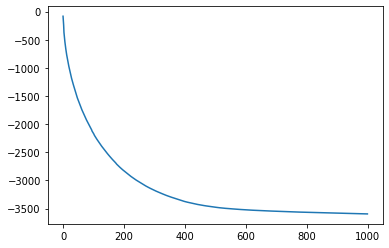

Policy for epsilon = 0.3 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


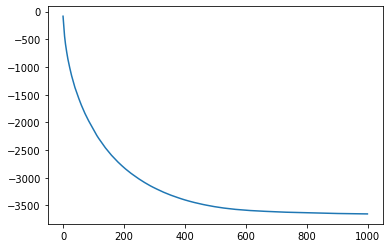

Policy for epsilon = 0.5 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


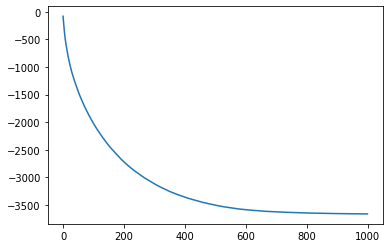

Policy for epsilon = 0.8 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


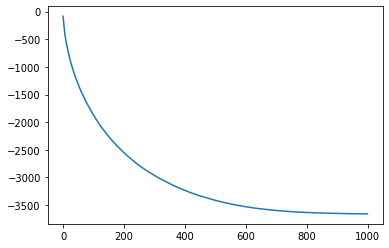

Policy for epsilon = 0.95 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


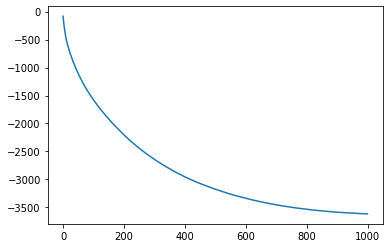

In [7]:
m, n = 7, 12
winds = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0])
max_iter = 1000
dest = (3,9)
for eps in [0.1, 0.3, 0.5, 0.8, 0.95]:
    env1 = P1(m, n, winds, eps, max_iter, dest)
    Q_total = env1.solve()
    print('Policy for epsilon = {} \n {}'.format(eps, env1.getU()))
    plt.plot(Q_total)
    plt.show()

# Q2

In [8]:
class P2():
    def __init__(self, m, n, winds, eps, max_iter, destination):
        self.Q_table = np.zeros((m*n, 4)) # 4 directions - N, E, S, W or up, right, down, left
        self.nu_table = np.zeros((m*n, 4))
        self.u_table = np.zeros((m*n,))
        self.m = m
        self.n = n
        self.eps = eps
        self.max_iter = max_iter
        self.winds = winds
        self.destination = destination
                    
    def solve(self):
        converged = False
        iter = 0
        Q_total = []
        while(converged == False and iter<self.max_iter):
            
            # iterating over all states
            for i in range(1, 1 + self.m*self.n):
                u = self.get_greedy_u(i, eps)
                self.nu_table[i-1, u] +=1
                
                if(self.next_state(i, u) >=38 and self.next_state(i, u)<=47):
                    self.Q_table[i-1, u] = self.Q_table[i-1, u] + self.a(self.nu_table[i-1, u])*(self.g(i, u) + self.max_u_Q(37)[1] - self.Q_table[i-1, u])
                else:        
                    self.Q_table[i-1, u] = self.Q_table[i-1, u] + self.a(self.nu_table[i-1, u])*(self.g(i, u) + self.max_u_Q(self.next_state(i, u))[1] - self.Q_table[i-1, u])
                
            iter+=1
            Q_total.append(self.Q_table.sum())
        
        return Q_total
    
    def get_greedy_u(self, s, eps):
        p = random.uniform(0, 1)
        u_opti, Qbest = self.max_u_Q(s)

        if(p>eps): #exploit
            return u_opti
        
        else: #explore
            u = self.get_random_valid_u(s, u_opti)
            return u
    
    def get_random_valid_u(self, s, u_opti):

        u_dash = random.randint(0, 3)
        return u_dash

    
    def g(self, i, u):
        next_i = self.next_state(i, u)
        r, c = self.get_r_c(next_i)
        if((r, c) == self.destination):
            return 0
        elif((next_i)<=47 and next_i>=38):
            return -100
        else:
            return -1
            
    def a(self, n):   
        return (1/n)**0.6
#         return 1/n
#         return 0.1
    
    def get_r_c(self, s):
        # to get row and col number from s. Indexes r and c are 0 based
        r = (s-1)//self.n
        c = (s-1)%self.n
        return r, c
    
    def get_s(self, r, c):
        # to get s from row and col number
        return (r*12 +c+1)
    
    
    def check_pirate_state(self, s, u):
#         print(s)
#         print(u)
#         print(self.next_state(s, u))
        if(self.next_state(s, u) >=38 and self.next_state(s, u)<=47):
            return 37
        else:
            return self.next_state(s, u)
    
    def next_state(self, s, u):
        r, c = self.get_r_c(s)
        if(u == 0):
            return self.get_s(max(r-1-self.winds[c], 0), c)
        elif(u == 1):
            return self.get_s(max(r-self.winds[c], 0), min(c+1, 11))
        elif(u == 2):
            return self.get_s(min(max(r+1-self.winds[c], 0), 3), c)
        elif(u == 3):
            return self.get_s(max(r-self.winds[c], 0), max(c-1, 0))
        
            
    
    def max_u_Q(self, i):
        r, c = self.get_r_c(i)
        ubest = -1
        Qbest = -np.inf
        for u in range(4):
            if(self.Q_table[i-1, u]>=Qbest):
                Qbest = self.Q_table[i-1, u]
                ubest = u
                
        return ubest, self.Q_table[i-1, ubest]
    
    def getQ(self):
        return self.Q_table
    
    def getU(self):
        
        policy = np.zeros((self.m, self.n))
        for r in range(self.m):
            for c in range(self.n):
                policy[r, c] = np.argmax(self.Q_table[self.get_s(r, c)-1])
        return policy
    
    def getnu(self):
        return self.nu_table

In [9]:
#m*n grid, m = rows, n = cols
m, n = 4, 12
#winds are 0 in this case
winds = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
eps = 0.2
max_iter = 5000
dest = (3,11)

env2 = P2(m, n, winds, eps, max_iter, dest)
Q_total = env2.solve()

In [10]:
print('Q values')
env2.getQ()

Q values


array([[ -13.99997073,  -13.        ,  -13.        ,  -13.99997471],
       [ -12.99997459,  -12.        ,  -12.        ,  -13.99997103],
       [ -11.99999148,  -11.        ,  -11.        ,  -12.99996888],
       [ -10.99999831,  -10.        ,  -10.        ,  -11.99999291],
       [  -9.99999749,   -9.        ,   -9.        ,  -10.9999981 ],
       [  -8.99999783,   -8.        ,   -8.        ,   -9.99999754],
       [  -7.99999966,   -7.        ,   -7.        ,   -8.99999933],
       [  -6.99999983,   -6.        ,   -6.        ,   -7.99999973],
       [  -5.99999995,   -5.        ,   -5.        ,   -6.99999957],
       [  -4.99999998,   -4.        ,   -4.        ,   -5.99999987],
       [  -3.99999999,   -3.        ,   -3.        ,   -4.99999999],
       [  -3.        ,   -3.        ,   -2.        ,   -4.        ],
       [ -13.99990334,  -12.        ,  -12.        ,  -12.99998671],
       [ -12.9999619 ,  -11.        ,  -11.        ,  -12.99998186],
       [ -11.99998237,  -10.      

In [11]:
print('Policy Optimal. N, E, S, W = 0, 1, 2, 3')
env2.getU()

Policy Optimal. N, E, S, W = 0, 1, 2, 3


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

Graph depicting sum of values of Q table with increase in iterations


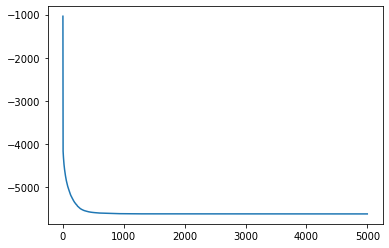

In [12]:
print('Graph depicting sum of values of Q table with increase in iterations')
plt.plot(Q_total)

### Running for different epsilons

Policy for epsilon = 0.1 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


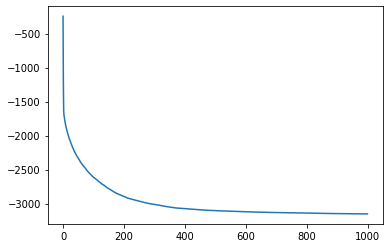

Policy for epsilon = 0.3 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


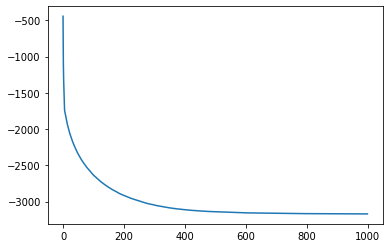

Policy for epsilon = 0.5 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


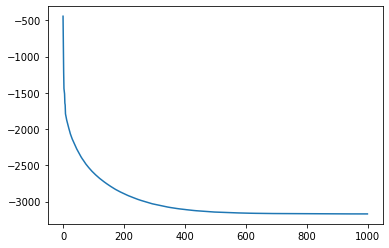

Policy for epsilon = 0.8 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


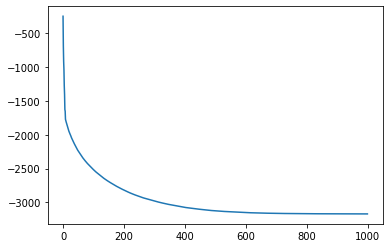

Policy for epsilon = 0.95 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


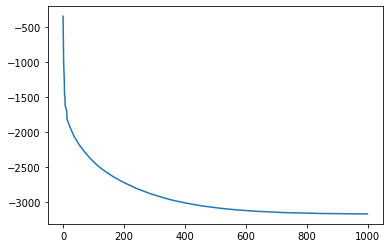

Policy for epsilon = 0.9999 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


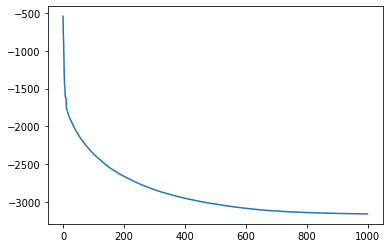

In [13]:
m, n = 4, 12
winds = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0])
max_iter = 1000
destination = (3,11)
for eps in [0.1, 0.3, 0.5, 0.8, 0.95, 0.9999]:
    env2 = P2(m, n, winds, eps, max_iter, destination)
    Q_total = env2.solve()
    print('Policy for epsilon = {} \n {}'.format(eps, env2.getU()))
    plt.plot(Q_total)
    plt.show()

### Discrepancy faced in epsilong greedy for problem 2

In [14]:
#m*n grid, m = rows, n = cols
m, n = 4, 12
#winds are 0 in this case
winds = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
eps = 0.2
max_iter = 1000
dest = (3,11)

env2 = P2(m, n, winds, eps, max_iter, dest)
Q_total = env2.solve()

In [15]:
print('Policy Optimal. N, E, S, W = 0, 1, 2, 3')
U = env2.getU()
print(U)

Policy Optimal. N, E, S, W = 0, 1, 2, 3
[[2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2.]
 [1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]


In [16]:
rewards = []
eps = 0.5
# flag = True
for episode in range(1000):
    sum = 0
    s = 37 #A
#     i = 0
    while(s!=48):
#         i+=1
        p = random.uniform(0, 1)
        u = 0
        r, c = env2.get_r_c(s)
        u_opti = U[r, c]
        if(p>eps): #exploit
            u = u_opti
        
        else: #explore
            u_ = env2.get_random_valid_u(s, u_opti)
            u = u_
        reward = env2.g(s, u)
        s = env2.check_pirate_state(s, u)
        sum+=reward
#         if(flag == True):
#             print(s)
#             print('i = ', i)
#     flag = False
    rewards.append(sum)


In [17]:
print(rewards)

[-990, -127, -1937, -249, -868, -641, -656, -442, -27, -1514, -1500, -662, -1085, -250, -34, -118, -142, -124, -669, -233, -251, -376, -773, -27, -241, -19, -879, -552, -127, -580, -20, -446, -257, -326, -118, -3748, -122, -226, -128, -772, -118, -344, -566, -237, -127, -455, -1264, -349, -349, -1381, -663, -2122, -128, -999, -232, -333, -116, -138, -39, -1524, -452, -38, -446, -458, -27, -783, -347, -30, -862, -1003, -20, -790, -262, -361, -125, -2207, -130, -117, -1001, -243, -1255, -224, -449, -246, -25, -161, -26, -775, -240, -456, -13, -124, -989, -671, -447, -330, -158, -528, -134, -21, -14, -23, -562, -122, -33, -1466, -594, -435, -23, -161, -847, -131, -442, -126, -569, -245, -462, -1321, -26, -131, -578, -1587, -344, -116, -1359, -989, -25, -18, -275, -323, -860, -18, -14, -254, -24, -23, -454, -20, -270, -261, -973, -746, -228, -705, -673, -129, -805, -123, -116, -438, -2278, -903, -24, -1092, -233, -22, -780, -884, -433, -382, -747, -14, -672, -786, -27, -440, -1211, -911, -

In [18]:
print(np.array(rewards).mean())

-547.357


## The above rewards are much higher than -12 which is the optimal reward